<a href="https://colab.research.google.com/github/ramansuri83/UT-AIML-Projects/blob/main/Project_Bank_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Churn Prediction

## Objective:
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Context: 
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Data Description: 
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

### Data Dictionary:
**RowNumber**: Row number.

**CustomerId**: Unique identification key for different customers.

**Surname:** Surname of the customer

**Credit Score:** Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.

**Geography**: The country to which the customer belongs.

**Gender:** The gender of the customer.

**Age:** Age of the customer.

**Tenure:** The period of time a customer has been associated with the bank.

**Balance:** The account balance (the amount of money deposited in the bank account) of the customer.

**NumOfProducts:** How many accounts, bank account affiliated products the person has.

**HasCrCard:** Does the customer have a credit card through the bank?

**IsActiveMember:** Subjective, but for the concept

**EstimatedSalary:** Estimated salary of the customer.

**Exited:** Did they leave the bank after all?

##Points Distribution:

The points distribution for this case is as follows:

1. Read the dataset
2. Drop the columns which are unique for all users like IDs (5 points)
3. Perform bivariate analysis and give your insights from the same (5 points) 
4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)
5. Normalize the train and test data (10points)
6. Initialize & build the model. Identify the points of improvement and implement the same. (20)
7. Predict the results using 0.5 as a threshold (10points)
8. Print the Accuracy score and confusion matrix (5 points)


# New Section

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, precision_recall_curve, auc
import matplotlib
from tensorflow.keras import optimizers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns

In [81]:
bank_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bank.csv')
bank_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Lets check the Dataset and look at its properties

In [82]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- There are total of 14 columns and total of 10000 entries.
- There seems to be a few categorical object columns and others a continuous variables
- The dependent variable in this case is Exited which tells us whether the customer left the bank or not

In [83]:
bank_data.shape

(10000, 14)

In [84]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Inference by looking at datasets:

- Its clear that the row number, customer ID dont add much value here and will probably have to be removed
- Most of the columns looks to be evenly distributed without much skewness. Only Balance seems to be skewed bit to the right.
- it will be interesting to see the bivairate analysis to see how the Exited columns/values is affected by the other independent variables


##Lets only keep what we need in the columns

- The first three columns serve no purpose here as they only identify the customer and add no info on the customer's behavior

In [85]:
bd = bank_data.copy()

In [86]:
bd.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [87]:
#Lets check the dataframe
bd

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [88]:
# Lets take a look at how many countries there are in geography column
bd["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

- There are only 3 countries. we will do some one hot coding on this later

In [89]:
# Now lets check the Gender
bd["Gender"].unique()

array(['Female', 'Male'], dtype=object)

- There are two genders in the data set. we should be able to do label encoding for this

In [90]:
bd['Exited'].unique()

array([1, 0])

## Univariate and Bivariate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


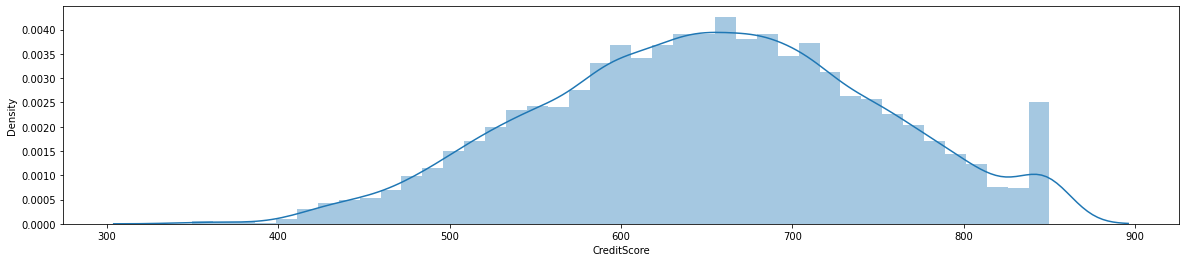

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


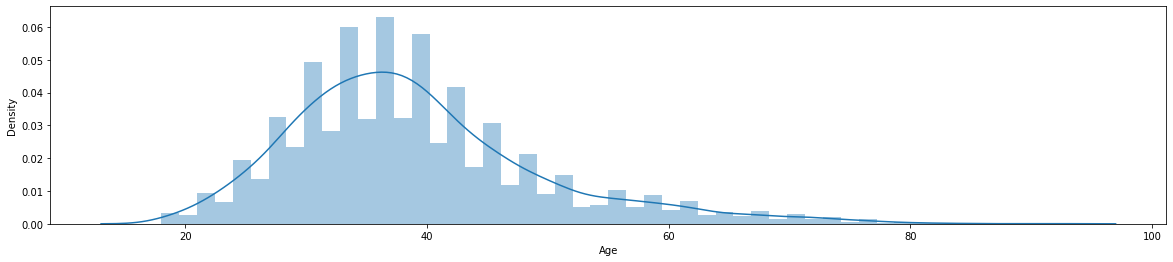

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


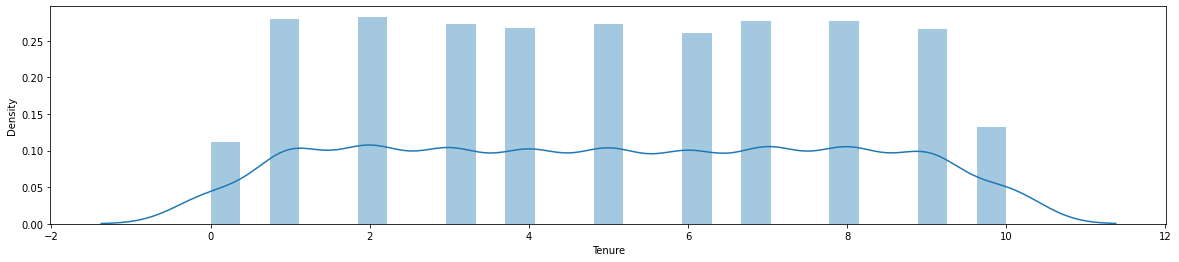

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


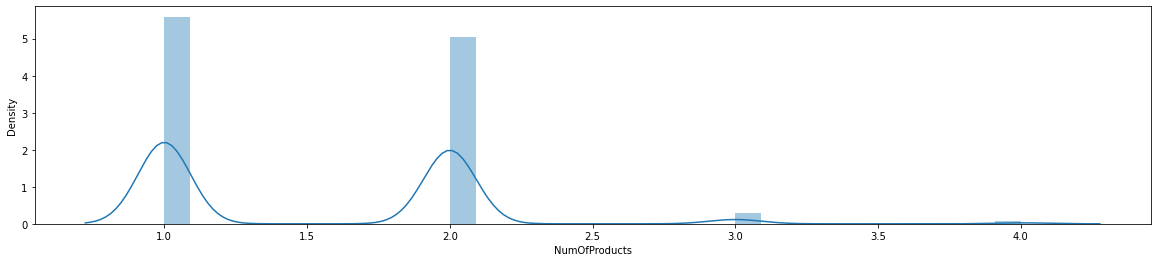

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


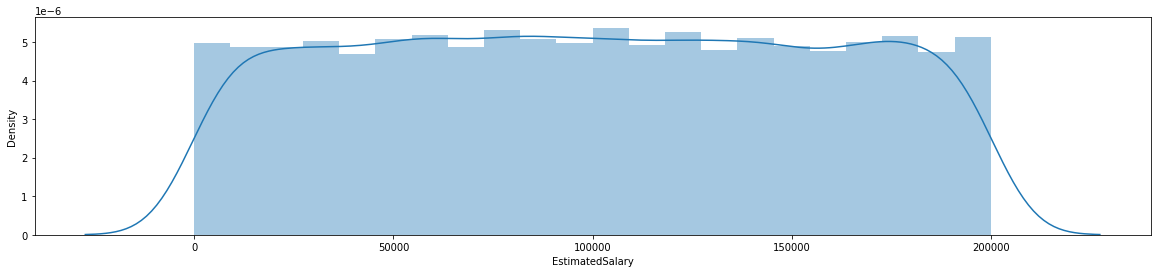

In [91]:
# although not sure if it helps, lets just check the distplot for continous columns
for i in bd[['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']]:
    plt.figure(figsize=(20,4))
    sns.distplot(bd[i], kde = True)
    plt.show()

- the dist plots dont really tell us much. we will have to definitely need to normalize the data before using it in our Nueral network model

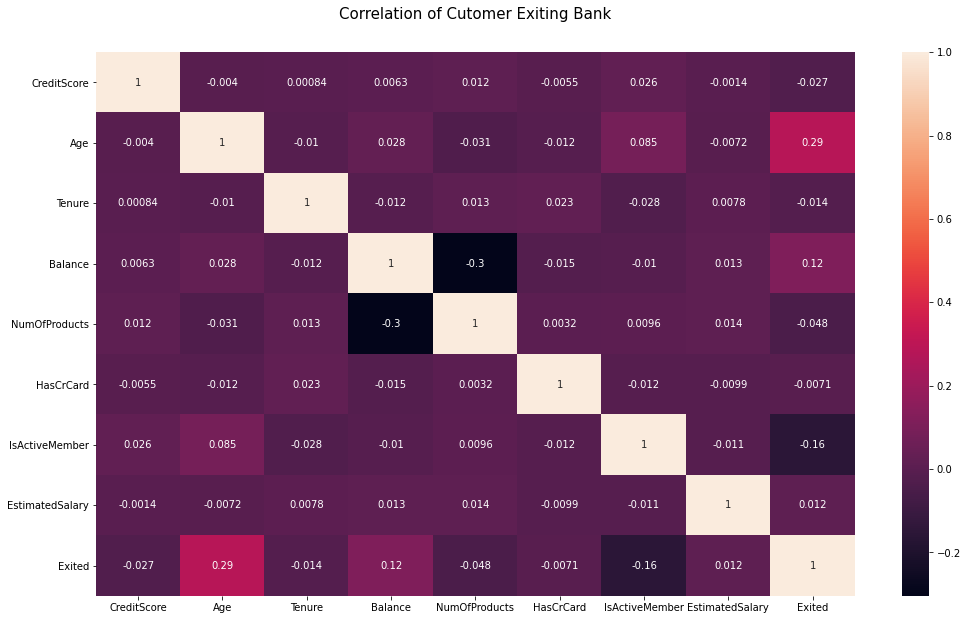

In [92]:
# Lets do a pair plot
plt.figure(figsize=(17,10))
plt.title('Correlation of Cutomer Exiting Bank', y=1.05, size=15)
sns.heatmap(bd.corr(), linecolor='white', annot=True)

- I dont see much correlation between the columns/variables

- lets see what we can find in the relation ship between the dependent variable and the continuous and categorical columns

In [93]:
#Lets do a quick groupby to see the relationship between the dependent variable and the continuous columns
bd.groupby(["Exited"]).mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


- It seems there is a bit of trend where older the person and has a bigger salary and bank balance, the more prone he/she is to leaving the Bank. that is not a good sign as those are the more profitable customers. There is something this bank is not doing right to hold on to its more wealthy customers

In [94]:
#lets do some crosstab analysis to see how the dependent variable interacts with the independent variables
for i in ['Gender', 'HasCrCard', 'IsActiveMember','Geography']:
    print(pd.crosstab(bd[i],bd['Exited'],normalize='columns'))
    print()

Exited         0         1
Gender                    
Female  0.427477  0.559156
Male    0.572523  0.440844

Exited            0         1
HasCrCard                    
0          0.292854  0.300933
1          0.707146  0.699067

Exited                 0         1
IsActiveMember                    
0               0.445435  0.639175
1               0.554565  0.360825

Exited            0         1
Geography                    
France     0.527942  0.397644
Germany    0.212859  0.399607
Spain      0.259199  0.202749



- it seems Females are more prone to exiting the bank
- it doesnt seem like has credit cards has a much of an eimpact on the customer existing or not
- It does seem Germany has more customer exiting than other countries



## Normalization: Lets encode the categorical values

In [95]:
# for Gender since the categories are related, lets do label encoding
le = preprocessing.LabelEncoder()
bd['Gender'] = le.fit_transform(bd['Gender'])

In [96]:
# for countries since the categories are unrelated, lets do oen hot encodinf using get_dummies
bd = pd.get_dummies(bd, prefix= 'Country')

In [97]:
#Let us check what we have
bd

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_France,Country_Germany,Country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [98]:
#Ltes prepare the dataframe so we can do the split between X and Yy for modeling
bd1 = bd.drop('Exited', axis = 1)

## Lets prepare the X and y datasets

In [99]:
#lets prepare the data split
X_data = bd1
y_data = bd.iloc[:,-4]

In [100]:
# Lets quickly check the X and y data
X_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Country_France,Country_Germany,Country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0


In [101]:
y_data

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [102]:
#Lets do the training and testing split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [103]:
# At this point we should normalization. I will like to use standard scaler as it fits well in this case.
scale = StandardScaler()
# Scaling fitted only to training set to avoid information leakage.
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [104]:
#lets just peek at the data
X_train

array([[-0.22482832,  0.91578261,  0.09984529, ...,  0.996257  ,
        -0.57581067, -0.57600312],
       [-0.8357854 ,  0.91578261, -0.84857831, ...,  0.996257  ,
        -0.57581067, -0.57600312],
       [-0.98075826,  0.91578261,  0.66889946, ..., -1.00375706,
        -0.57581067,  1.73610172],
       ...,
       [ 0.34470794,  0.91578261, -0.37436651, ...,  0.996257  ,
        -0.57581067, -0.57600312],
       [ 0.36541835,  0.91578261, -0.46920887, ..., -1.00375706,
        -0.57581067,  1.73610172],
       [ 0.76927133,  0.91578261, -1.22794775, ...,  0.996257  ,
        -0.57581067, -0.57600312]])

In [105]:
#lets just confirm the shape of the split dataframes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 12)
(2000, 12)
(8000,)
(2000,)


## Let us create the Model

In [106]:
#We will use teh sequential for now as it is easier than functional
model = Sequential()

## Lets add layers and activations

It should be noted that as this is a classification problem, sigmoid layer should be added. if it was multi class we could have done softmax

In [107]:
# I have decided to use activation as rely for the first dense layer and tanh for the second hidden layer.
# as for how dense to make the layers, i picked random numbers as 16 and 8. we will try different numbers if we dont get good results
model.add(Dense(16, input_shape = (12,), activation = 'relu'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

## Lets compile the Model with optimizers and loss functions


In [108]:
#lets specify the optimizer and learning rate. i have gone with Adam and 0.001 learning rate. we will see how it performs
sgd = optimizers.Adam(lr = 0.0001)

In [109]:
#i  ia m using binary cross entropy as the loss function
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics=['accuracy'])

Summary of the model

In [110]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                208       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


Training the model

In [111]:
model.fit(X_train, y_train.values, batch_size = 100, epochs = 100)

Epoch 1/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6020 - accuracy: 0.6801
Epoch 2/100
80/80 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7836
Epoch 3/100
80/80 [==============================] - 0s 972us/step - loss: 0.4864 - accuracy: 0.8034
Epoch 4/100
80/80 [==============================] - 0s 1ms/step - loss: 0.4859 - accuracy: 0.7942
Epoch 5/100
80/80 [==============================] - 0s 1ms/step - loss: 0.4829 - accuracy: 0.7938
Epoch 6/100
80/80 [==============================] - 0s 1ms/step - loss: 0.4690 - accuracy: 0.7970
Epoch 7/100
80/80 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.7987
Epoch 8/100
80/80 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.8035
Epoch 9/100
80/80 [==============================] - 0s 1ms/step - loss: 0.4527 - accuracy: 0.8060
Epoch 10/100
80/80 [==============================] - 0s 1ms/step - loss: 0.4545 - accuracy: 0.8054
Epoch 1

- I probably did not need that many epochs becuase the loss and accuracy was pretty consistent after the first few epochs which means the minima was reached pretty early on. maybe i will try less epochs and a different learning rate

In [112]:
results = model.evaluate(X_test, y_test.values)

63/63 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8570


In [113]:
print(model.metrics_names)
print(results)    

['loss', 'accuracy']
[0.3574844300746918, 0.8569999933242798]


## Lets try this again with some different hyperparameter values to see if we can get better accuracy

In [114]:
model = Sequential()

In [115]:
#I am going to try different number of nodes for our Nueral network layers
model.add(Dense(64, input_shape = (12,), activation = 'relu'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

In [116]:
#Lets also try a faster learning rate
sgd = optimizers.Adam(lr = 0.001)

In [117]:
#rest of the things i will keep the same
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics=['accuracy'])

In [118]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                832       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [119]:
#I am trying with reduced number of epochs and a smaller batch size
model.fit(X_train, y_train.values, batch_size = 30, epochs = 30)

Epoch 1/30
267/267 [==============================] - 1s 1ms/step - loss: 0.5734 - accuracy: 0.7201
Epoch 2/30
267/267 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.8006
Epoch 3/30
267/267 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.8082
Epoch 4/30
267/267 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8155
Epoch 5/30
267/267 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8252
Epoch 6/30
267/267 [==============================] - 0s 1ms/step - loss: 0.4136 - accuracy: 0.8265
Epoch 7/30
267/267 [==============================] - 0s 1ms/step - loss: 0.4064 - accuracy: 0.8313
Epoch 8/30
267/267 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8222
Epoch 9/30
267/267 [==============================] - 0s 1ms/step - loss: 0.3890 - accuracy: 0.8409
Epoch 10/30
267/267 [==============================] - 0s 1ms/step - loss: 0.3828 - accuracy: 0.8435

In [120]:
results = model.evaluate(X_test, y_test.values)

63/63 [==============================] - 0s 927us/step - loss: 0.3526 - accuracy: 0.8595


- It seems I get a little better acccuracy although it is not that much of a improvement. I actually tried a lot of different hyperparameters but could not find much improvement so i think we can stick with this model

In [121]:
print(model.metrics_names)
print(results)    

['loss', 'accuracy']
[0.35264506936073303, 0.859499990940094]


# Lets Evaluate the model and check confusion matrix

In [122]:
# Lets first get the predicted values
y_predicted = model.predict(X_test)

In [123]:
#The sigmoid function returns the probabilities. lets check them
y_predicted

array([[0.37822688],
       [0.06633386],
       [0.02461717],
       ...,
       [0.18366846],
       [0.31575152],
       [0.08741817]], dtype=float32)

In [124]:
# lets convert the y predicted to a binaty classifier implementing 0.5 probabilty as a threshold
y_predicted [y_predicted < 0.5] = 0

In [125]:
y_predicted [y_predicted >= 0.5] = 1

In [126]:
#Lets take a quick look at y_predicted
y_predicted

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [127]:
#Lets get all the mterics including confusion matrix
cm = confusion_matrix(y_test, y_predicted)
print(cm)
accuracy_score(y_test, y_predicted)
print('Accuracy: '+ str(accuracy_score(y_test, y_predicted)))
print('Recall_score: ' + str(recall_score(y_test, y_predicted)))
print('Precision_score: ' + str(precision_score(y_test, y_predicted)))
print('F-score: ' + str(f1_score(y_test, y_predicted)))


[[1521   68]
 [ 213  198]]
Accuracy: 0.8595
Recall_score: 0.48175182481751827
Precision_score: 0.7443609022556391
F-score: 0.58493353028065



 Accuracy = approx 86%

Total correct predictions that customers stay in bank = 1521

Total correct predictions that customers leave the bank = 198

Total incorrect predictions that customers stay in the bank = 213

Total incorrect predictions that customers leave in the bank = 68

I believe we could made some improvements by playing with different loss and activation functions and other hyperparameters but since we have achieved around 86% accuracy we have met the goal of this model 